## Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<img src="images/titanic-sinking.jpg" height="auto" width="auto"></img>

## 2. Collecting the data

training and testing data set can be obtained from https://www.kaggle.com/c/titanic/data

In [1]:
# importing plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # set seaborn default for plots

# Load training and testing dataset with pandas
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
type(train)

pandas.core.frame.DataFrame

In [3]:
type([train, test])

list

In [4]:
# Let's peek on the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	||
|Age	|Age in years	||
|sibsp	|# of siblings / spouses aboard the Titanic	||
|parch	|# of parents / children aboard the Titanic	||
|ticket	|Ticket number	||
|fare	|Passenger fare	||
|cabin	|Cabin number	||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes
**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them|.


## 3. Investigating the dataset

In [5]:
# peek test data set
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# train data set dimension
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
## pandas .isnull() method returns elements that have null values
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
# summing up the null counts
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
def bar_graph(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

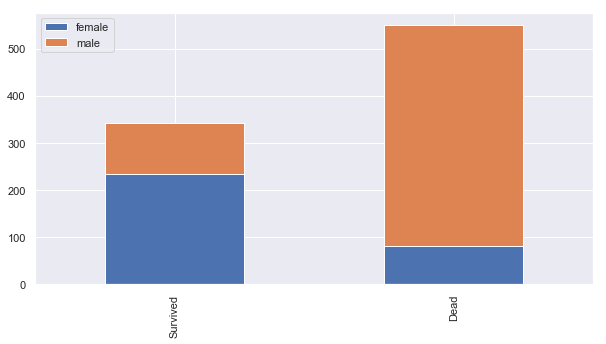

In [14]:
bar_graph('Sex')

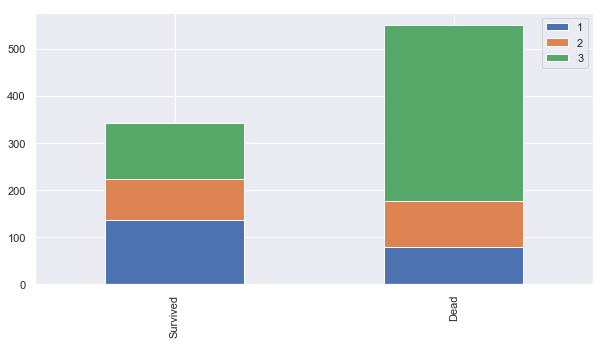

In [15]:
bar_graph('Pclass')

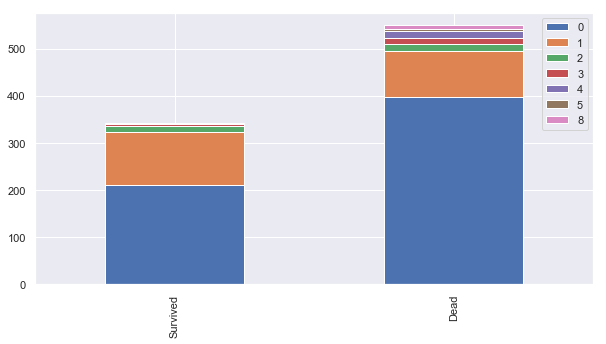

In [16]:
bar_graph('SibSp')

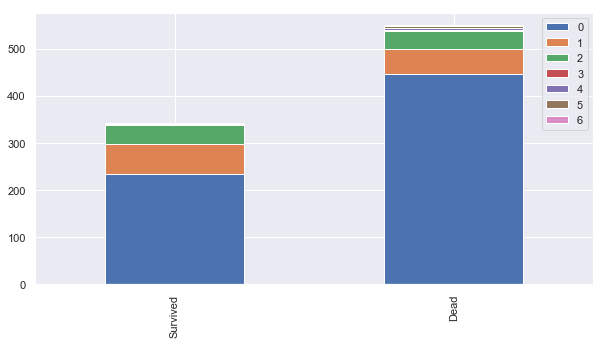

In [17]:
bar_graph('Parch')

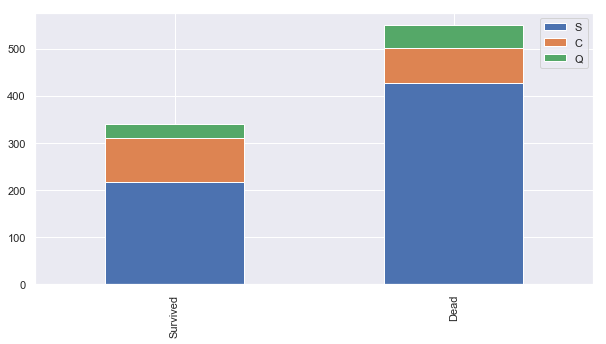

In [18]:
bar_graph('Embarked')

## 4. Feature Engineering

Transforming raw data into feature vectors that can be used by the ML algorithm.

Feature vector: n-dimensional vector of numerical features that represent some object.

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4.2 Name

In [20]:
train_test_data = [train, test] # combine train and test dataset

for instance in train_test_data:
    instance['Title'] = instance['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Ms            1
Don           1
Capt          1
Countess      1
Jonkheer      1
Mme           1
Lady          1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

Mapping title
{
    Mr: 0,
    Miss: 1,
    Mrs: 2,
    Others: 3
}

In [23]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train['Title'].fillna("Mr")
test['Title'].fillna("Mr")


0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7          Mr
8         Mrs
9          Mr
10         Mr
11         Mr
12        Mrs
13         Mr
14        Mrs
15        Mrs
16         Mr
17         Mr
18       Miss
19        Mrs
20         Mr
21     Master
22        Mrs
23         Mr
24        Mrs
25         Mr
26       Miss
27         Mr
28         Mr
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [24]:
for instance in train_test_data:
    instance['Title'] = instance['Title'].map(title_mapping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


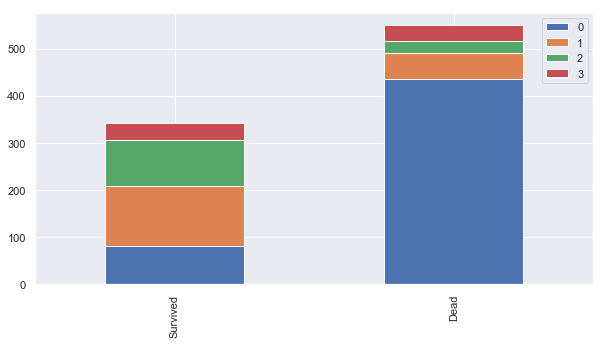

In [26]:
bar_graph('Title')

In [27]:
# delete the 'Name' attribute from the dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
sex_mapping = {
    "male": 0, "female": 1
}

for instance in train_test_data:
    instance['Sex'] = instance['Sex'].map(sex_mapping)

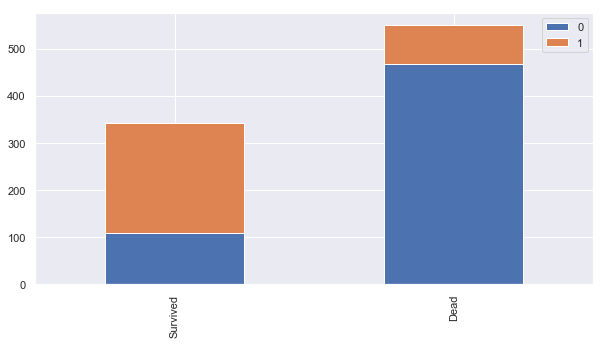

In [30]:
bar_graph('Sex')

## 4.4 Age

some age is missing

In [31]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [32]:
train["Age"].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [33]:
# fill in the missing age values with the median age for each title (Mr, Mrs, Miss, Other)
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

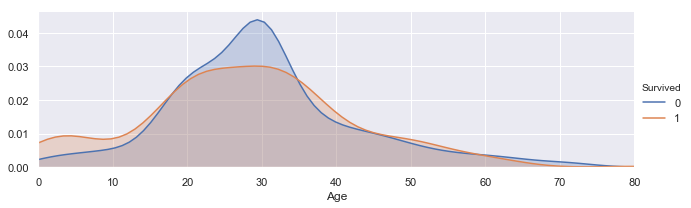

In [34]:
facet = sns.FacetGrid(train, hue="Survived", aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

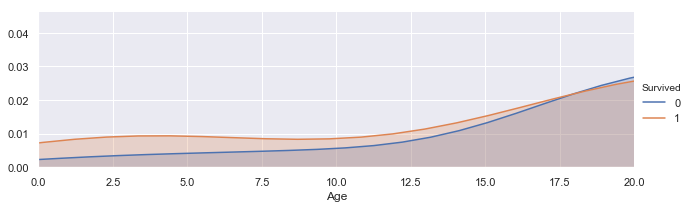

In [35]:
facet = sns.FacetGrid(train, hue="Survived", aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, 20))
facet.add_legend()
plt.show()

### binning the age
child:0, young:1, adult:2, mid-age:3, senior:4

In [36]:
for instance in train_test_data:
    instance.loc[instance['Age'] <= 16, 'Age'] = 0
    instance.loc[(instance['Age'] > 16) & (instance['Age'] <= 26), 'Age'] = 1
    instance.loc[(instance['Age'] > 26) & (instance['Age'] <= 36), 'Age'] = 2
    instance.loc[(instance['Age'] > 36) & (instance['Age'] <= 62), 'Age'] = 3
    instance.loc[instance['Age'] > 62, 'Age'] = 4

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


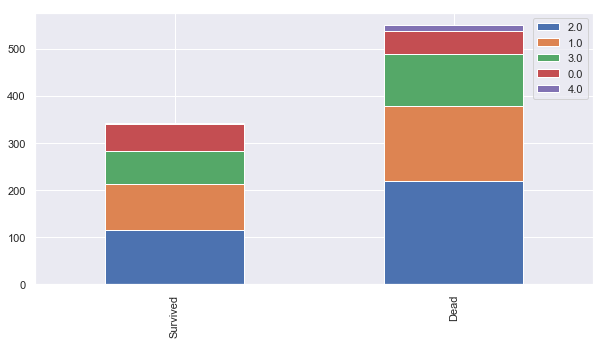

In [38]:
bar_graph('Age')

### Embarked

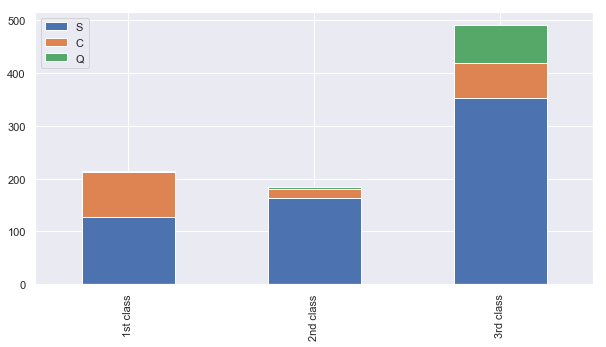

In [39]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [40]:
# above suggest that majority of ppl embarked from S. Thus, we
# will replace missing values with 'S'
for instance in train_test_data:
    instance['Embarked'] = instance['Embarked'].fillna('S')

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [41]:
# map alphabet to number
embarked_mapping = {"S":0, "C":1, "Q":2}
for instance in train_test_data:
    instance['Embarked'] = instance['Embarked'].map(embarked_mapping)

### Fare

In [42]:
train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

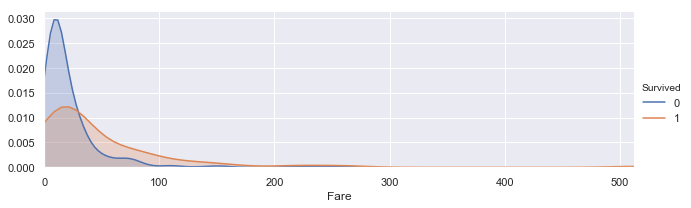

In [43]:
facet = sns.FacetGrid(train, hue="Survived", aspect=3)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

In [44]:
# binning
for instance in train_test_data:
    instance.loc[instance['Fare'] <= 17, 'Fare'] = 0
    instance.loc[(instance['Fare'] > 17) & (instance['Fare'] <= 30), 'Fare'] = 1
    instance.loc[(instance['Fare'] > 30) & (instance['Fare'] <= 100), 'Fare'] = 2
    instance.loc[instance['Fare'] > 100, 'Fare'] = 3

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### Cabin

In [45]:
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
C22 C26            3
F2                 3
D                  3
E101               3
B18                2
C123               2
E8                 2
B22                2
D17                2
B58 B60            2
D35                2
C93                2
C126               2
C124               2
D36                2
B57 B59 B63 B66    2
D20                2
F G73              2
C92                2
E33                2
B20                2
E25                2
C2                 2
C125               2
D33                2
E24                2
                  ..
A10                1
C128               1
F E69              1
B82 B84            1
D11                1
B78                1
B41                1
E58                1
C111               1
D7                 1
E63                1
D49                1
T                  1
B101               1
A20                1
D37                1
C99          

In [46]:
for instance in train_test_data:
    instance['Cabin'] = instance['Cabin'].str[:1]

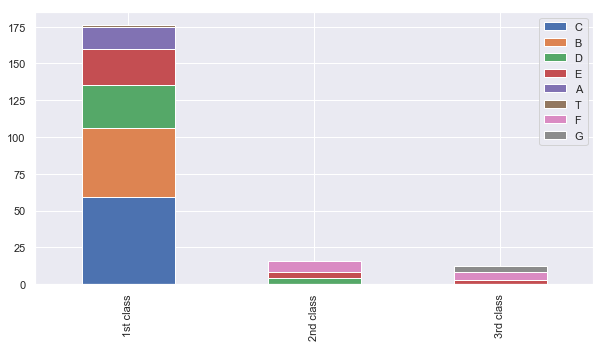

In [47]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [48]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [49]:

# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### family size

In [50]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

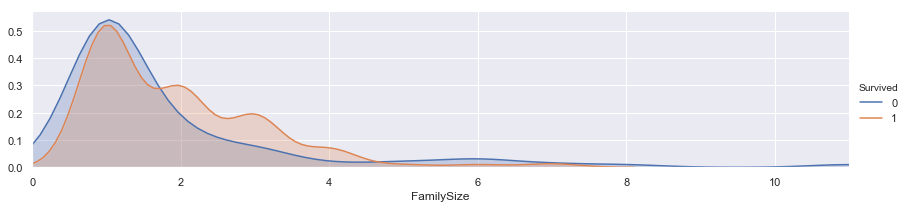

In [51]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [52]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [54]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [55]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [56]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## Modelling

In [57]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [60]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [61]:
# kNN Score
round(np.mean(score)*100, 2)

82.6

In [62]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.7752809  0.7752809  0.88764045 0.76404494
 0.84269663 0.82022472 0.74157303 0.78651685]


In [63]:
# decision tree Score
round(np.mean(score)*100, 2)

79.69

In [64]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.82022472 0.82022472 0.76404494 0.87640449 0.78651685
 0.82022472 0.80898876 0.78651685 0.84269663]


In [65]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.15

In [66]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [67]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

In [68]:
# SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [69]:
round(np.mean(score)*100,2)

83.5

## Testing

In [76]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8
5,897,3,0,0.0,0.0,2.0,0,0,0.0
6,898,3,1,2.0,0.0,2.0,2,1,0.0
7,899,2,0,1.0,1.0,2.0,0,0,0.8
8,900,3,1,1.0,0.0,2.0,1,2,0.0
9,901,3,0,1.0,1.0,2.0,0,0,0.8


In [73]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [74]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('submission.csv', index=False)

In [75]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
